# Dimensionality d-ball volume and area Test Cases
This notebook is an extension of the pytest file used in TDD. It shows the results of the following function(s) in the library

- get_volume_ball_d_p
- MC_volume_unit_ball_d_p

In [ ]:
from scipy.special import gamma
import numpy as np
import pylab as plt

## Functions

In [48]:
def get_volume_ball_d_p(d, p, R):
    """
    Computes the volume of the d-dimensional ball with radius R and p value.
    Reference: https://www.whitman.edu/documents/Academics/Mathematics/2014/jorgenmd.pdf

    Parameters:
    d:  scalar
        dimension
    p:  scalar (p>=1)
        p value of the p-norm.
            p = 1, Manhattan
            p = 2, Eucledian
            p = np.inf, Max
    R:  scalar
        Radius of d-ball R >= 0

    Returns:
    volume:  scalar
        exact value of the volume of n-ball
    """
    return np.power(2*gamma(1./p +1),d)*np.power(R,d)/gamma(1.*d/p+1)

In [49]:
def MC_volume_unit_ball_d_p(d,p,N_iterations = 100):
    """
     Estimates the volume of the d-dimensional ball with radius R and p value using a Monte Carlo method.
     The idea is to find the ratio of uniformely distributed points in the d-cube that fall inside the
     unit d-ball.
     Reference:     # https://core.ac.uk/download/pdf/72843286.pdf

     Parameters:
     d:  scalar
         dimension
     p:  scalar (p>=1)
         p value of the p-norm.
         p = 1, Manhattan
         p = 2, Eucledian
         p = np.inf, Max
     N_iterations: scalar
        number of iterations in the MC

     Returns:
     ratio:  scalar
         ratio of volume n-ball and n-cube
     """     
    data = 2*(np.random.uniform(size=(N_iterations,d))-0.5)
    norm_data = np.linalg.norm(data,ord=p,axis=1)
    data_inside = np.sum((norm_data < 1)*1.)
    ratio = data_inside/N_iterations
    return(ratio)

## d-ball individual tests

In [51]:
# Estimating the volume of the 2-sphere (circle) and comparing to analytical value, Euclidean distance
MC_volume_unit_ball_d_p(d=2,p=2,N_iterations = 1000000), get_volume_ball_d_p(d=2, p=2, R=1)/np.power(2,2)

(0.785972, 0.7853981633974482)

In [52]:
# Estimating the volume of the 2-sphere (circle) and comparing to analytical value, p=3
MC_volume_unit_ball_d_p(d=2,p=3,N_iterations = 10000000), get_volume_ball_d_p(d=2, p=3, R=1)/np.power(2,2)

(0.8834872, 0.8833193751427245)

In [20]:
# Estimating the volume of the 2-sphere (circle) and comparing to analytical value, p=inf 
MC_volume_unit_ball_d_p(d=2,p=np.inf,N_iterations = 10000000), get_volume_ball_d_p(d=2, p=np.inf, R=1)/np.power(2,2)

(1.0, 1.0)

In [22]:
# Estimating the volume of the 20-sphere and comparing to analytical value, p=3
MC_volume_unit_ball_d_p(d=20,p=np.inf,N_iterations = 10000000), get_volume_ball_d_p(d=20, p=np.inf, R=1)/np.power(2,20)

(1.0, 1.0)

Interesting. The ratio of the volumes for the d-ball and d-cube is one for all the p = inf cases. 

## Behavior of volume ratio d-ball and d-cube Test

In [53]:
# we compute the analytical value of the ratio as well as the MC simulation of several values of p
lD = np.arange(1,10)
lD_c = np.arange(1,10,0.1)
lRatioBallCubeMC_p2 = [MC_volume_unit_ball_d_p(d=d,p=2,N_iterations = 1000000) for d in lD]
lRatioBallCubeAnalytical_p2 = get_volume_ball_d_p(lD_c,p=2,R=1)/np.power(2,lD_c)

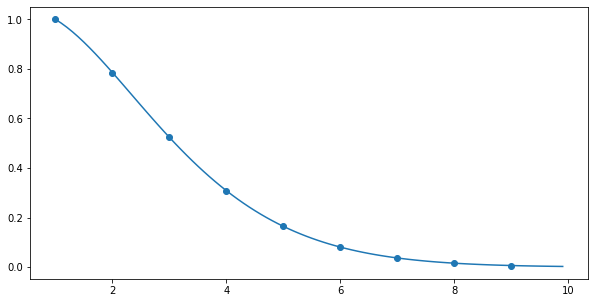

In [54]:
plt.figure(figsize=(10,5))
plt.plot(lD_c,lRatioBallCubeAnalytical)
plt.scatter(lD,lRatioBallCubeMC)
plt.show()

In [36]:
lRatioBallCubeMC_p3 = [MC_volume_unit_ball_d_p(d=d,p=3,N_iterations = 1000000) for d in lD]
lRatioBallCubeAnalytical_p3 = get_volume_ball_d_p(lD_c,p=3,R=1)/np.power(2,lD_c)

In [37]:
lRatioBallCubeMC_p4 = [MC_volume_unit_ball_d_p(d=d,p=4,N_iterations = 1000000) for d in lD]
lRatioBallCubeAnalytical_p4 = get_volume_ball_d_p(lD_c,p=4,R=1)/np.power(2,lD_c)

In [38]:
lRatioBallCubeMC_p1 = [MC_volume_unit_ball_d_p(d=d,p=1,N_iterations = 1000000) for d in lD]
lRatioBallCubeAnalytical_p1 = get_volume_ball_d_p(lD_c,p=1,R=1)/np.power(2,lD_c)

In [39]:
lRatioBallCubeMC_pinf = [MC_volume_unit_ball_d_p(d=d,p=np.inf,N_iterations = 1000000) for d in lD]
lRatioBallCubeAnalytical_pinf = get_volume_ball_d_p(lD_c,p=np.inf,R=1)/np.power(2,lD_c)

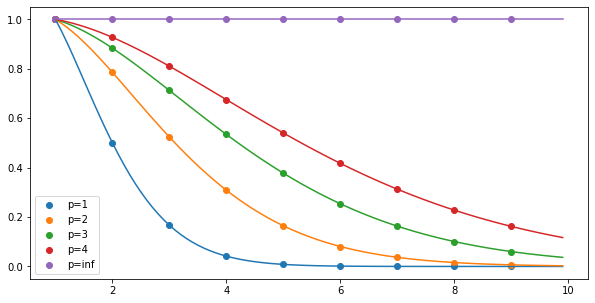

In [47]:
plt.figure(figsize=(10,5))
plt.plot(lD_c,lRatioBallCubeAnalytical_p1)
plt.scatter(lD,lRatioBallCubeMC_p1,label='p=1')

plt.plot(lD_c,lRatioBallCubeAnalytical_p2)
plt.scatter(lD,lRatioBallCubeMC_p2,label='p=2')

plt.plot(lD_c,lRatioBallCubeAnalytical_p3)
plt.scatter(lD,lRatioBallCubeMC_p3,label='p=3')

plt.plot(lD_c,lRatioBallCubeAnalytical_p4)
plt.scatter(lD,lRatioBallCubeMC_p4,label='p=4')

plt.plot(lD_c,lRatioBallCubeAnalytical_pinf)
plt.scatter(lD,lRatioBallCubeMC_pinf,label='p=inf')

plt.legend()

plt.savefig('RatioVaolumeBallCube_d_p.png')